# <font color=blue>**Web & Social Media Analytics**

## <font color= darkblue>Problem Overview-
    

Suppose your customer is a mobile manufacturer based in the US, which entered the market three years ago. As they are a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly. They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

## <font color= darkblue>Problem Objective-
    

Assume that as a data analytics provider, you have been approached by this mobile phone manufacturer. They want you to provide them with some major insights into the mobile phone industry to help them achieve their objective. Their objective is to develop a new product optimally and create some marketing strategies.

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls drive/'MyDrive/'

'Colab Notebooks'   meta.csv   Resume   sentiment_anaylsis


In [3]:
# Importing required library
import pandas as pd
import numpy as np

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information. 
We begin by unzipping the meta data file and extracting its content to a list



In [4]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/sentiment_anaylsis/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/sentiment_anaylsis/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [5]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [6]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [7]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

#creating new .csv file for meta
df_meta.to_csv('/content/drive/MyDrive/meta.csv')

#reading meta.csv file
df_meta=pd.read_csv('/content/drive/MyDrive/meta.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
#Reading the .csv file of the phone data into a dataframe
df_phonedata = pd.read_csv('/content/drive/MyDrive/sentiment_anaylsis/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


# **Data Pre-Processing**

In [10]:
# Converting unix review time to date-time format
# Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [11]:
# Inspecting df_phonedata dataframe
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE,2014-02-02


In [12]:
#Basic information of df_phonedata
df_phonedata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [13]:
# Checking Shape of df_phonedata dataframe
df_phonedata.shape

(1128437, 13)

Dataframe contains **1128437** rows and **13** columns

In [14]:
# Checking for null values in the dataset
round(100*(df_phonedata.isnull().sum()/df_phonedata.shape[0]), 2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style               46.36
reviewerName         0.01
reviewText           0.07
summary              0.05
unixReviewTime       0.00
vote                91.84
image               97.60
review_sentiment     0.00
Date&Time            0.00
dtype: float64

**'vote'**, **'image'** columns contains more than 91% of null values and **'style'** column contain almost 46% of null values.
So we can drop them because of high null values.

In [15]:
#dropping 'Style' Column
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [16]:
# checking null Values again
round(100*(df_phonedata.isnull().sum()/df_phonedata.shape[0]), 2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style                0.00
reviewerName         0.01
reviewText           0.07
summary              0.05
unixReviewTime       0.00
vote                92.09
image               97.34
review_sentiment     0.00
Date&Time            0.00
dtype: float64

In [17]:
# Dropping columns with higher null values
df_phonedata.drop(['vote','image','unixReviewTime'], axis = 1, inplace = True) 

In [18]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
226,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10
227,5.0,True,AXGPQOWI0CF39,961301375X,{'Color:': ' White'},TimB.,I am very satisfied with this product! It came...,Very Nice Looking Item!,POSITIVE,2014-01-31
228,5.0,True,A1SI6TJGULNBSM,961301375X,{'Color:': ' White'},Reashea Thigpen,"It works good, the light is quite bright, but ...","It works good, the light is quite bright",POSITIVE,2015-01-07
229,1.0,True,A1KGX6ZUP9BVIZ,961301375X,{'Color:': ' White'},h l m,waste of time and money. Light stays on but it...,One Star,POSITIVE,2014-12-13


In [19]:
# Basic numerical summary
df_phonedata.describe()

,overall
count,605241.000000
mean,4.257537
std,1.198782
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
# Shape of df_phonedata after dropping some columns
df_phonedata.shape

(605241, 10)

After dropping some columns final data of **df_phonedata** Dataframe contains **605241** rows and **10** columns

In [21]:
# Now let's clean df_meta dataframe
df_meta.head(5)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,NaN,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,NaN,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240
3,3,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,Puppies Faceplate Hard Case Protector for Net1...,[],[],NaN,Live2Pedal,['Protect your phone with style through this A...,"['>#6,368,825 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501710
4,4,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,White Wolf Faceplate Protector Hard Case for S...,[],[],NaN,wirelessoutletusa,['Protect your phone with style through this A...,"['>#2,672,454 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501273


In [22]:
# Information about the dataframe
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    590071 non-null  int64 
 1   category      590071 non-null  object
 2   tech1         6585 non-null    object
 3   description   590071 non-null  object
 4   fit           43 non-null      object
 5   title         590062 non-null  object
 6   also_buy      590071 non-null  object
 7   image         590071 non-null  object
 8   tech2         231 non-null     object
 9   brand         577311 non-null  object
 10  feature       590071 non-null  object
 11  rank          590071 non-null  object
 12  also_view     590071 non-null  object
 13  details       590071 non-null  object
 14  main_cat      586685 non-null  object
 15  similar_item  50931 non-null   object
 16  date          45880 non-null   object
 17  price         127564 non-null  object
 18  asin          590071 non

In [23]:
# Shape of dataframe
df_meta.shape

(590071, 19)

**df_meta** dataframe contains **590071** rows and **19** columns

In [24]:
# Numerical summary of dataframe
df_meta.describe()

,Unnamed: 0
count,590071.000000
mean,295035.000000
std,170338.969683
min,0.000000
25%,147517.500000
50%,295035.000000
75%,442552.500000
max,590070.000000


In [25]:
# Checking 'Price' column
df_meta.price.value_counts()

$7.99      6293
$9.99      6204
$6.99      5131
$8.99      4384
$14.99     3728
           ... 
$19.54        1
$65.24        1
$100.60       1
$23.30        1
$75.24        1
Name: price, Length: 4668, dtype: int64

In [26]:
#dropping duplicates in ASIN
df_meta.drop_duplicates(subset='asin',inplace=True)

In [27]:
mask=df_meta["category"].apply(lambda x:x[31:35]=="Cell")

In [28]:
df_meta=df_meta[mask]
df_meta.head(2)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
36,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508
1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR


In [29]:
# Null values available in df_meta dataframe
round((df_meta.isnull().sum()/df_meta.shape[0])*100,2)

Unnamed: 0        0.00
category          0.00
tech1            99.68
description       0.00
fit             100.00
title             0.00
also_buy          0.00
image             0.00
tech2            99.91
brand             1.26
feature           0.00
rank              0.00
also_view         0.00
details           0.00
main_cat          0.14
similar_item     70.04
date             97.59
price            82.19
asin              0.00
dtype: float64

**'tech1'**, **'fit'**, **'tech2'**,  **'date'** columns contains high null values 
So we can drop that columns which have high null values.

In [30]:
# Dropping 
df_meta.drop(['tech1','tech2','fit','date'], axis = 1, inplace = True) 

In [31]:
df_meta.also_view

36                                                       []
1274      ['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...
1295                                                     []
1354                                                     []
1361                                                     []
                                ...                        
589898                                                   []
589906                                                   []
589908                                                   []
590015                                                   []
590019                                                   []
Name: also_view, Length: 9789, dtype: object

In [32]:
# Removeing unexpect delimiters
df_meta=df_meta.assign(also_view_new=df_meta.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'','').str.split(','))

<ipython-input-32-b2470ac59188>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_meta=df_meta.assign(also_view_new=df_meta.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'','').str.split(','))


In [33]:
# function to get brand name from the list of also_view

def get_brand_name(l):
    b_list=[]
    brand=''
    for i in range(0,len(l)):
        b=df_meta[df_meta["asin"]==l[i]]["brand"]
    
        if len(b)>0:
            brand=b.values[0]
            if brand not in b_list:
                b_list.append(brand)
    
    return b_list

In [34]:
df_meta['Other_brand_name']= [get_brand_name(l) if len(l) > 0 else np.nan for l in df_meta['also_view_new']]

In [35]:
# Dropping 'also_view' and 'also_view_new' columns
df_meta.drop(['also_view','also_view_new'], axis=1, inplace=True)

In [36]:
df_meta1=df_meta[~df_meta['price'].isna()]

In [37]:
df_meta1=df_meta1[~df_meta1['similar_item'].isna()]

In [38]:
df_meta1=df_meta1[~df_meta1['brand'].isna()]

In [39]:
df_meta1.to_csv('/content/drive/MyDrive/data.csv')

In [40]:
df_meta=pd.read_csv('/content/drive/MyDrive/data.csv')
df_meta.head(2)

,Unnamed: 0,Unnamed: 0.1,category,description,title,also_buy,image,brand,feature,rank,details,main_cat,similar_item,price,asin,Other_brand_name
0,2925,2925,"['Cell Phones & Accessories', 'Cell Phones', '...","['An entry level handset with a clean, stylish...",Virgin Mobile Shorty Phone- Blue,[],['https://images-na.ssl-images-amazon.com/imag...,Nokia,[],"['>#436,771 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B0009EP76Y,"['Kyocera', 'BLU', 'GreatCall', 'Samsung', 'No..."
1,3234,3234,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Get more with this digital camera phone by u...",Verizon or PagePlus LG VX5200 Great Condition ...,['B004GK67UW'],['https://images-na.ssl-images-amazon.com/imag...,LG,[],"['>#508,503 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",.a-box-inner{background-color:#fff}#alohaBuyBo...,B000BH9V0M,"['GreatCall', 'Samsung', 'LG', 'Verizon']"


**Merging datasets**

In [41]:
#merging the meta and phonedata datasets
reviews = pd.merge(df_phonedata, df_meta, how="inner", on=["asin"])

In [42]:
reviews.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,...,also_buy,image,brand,feature,rank,details,main_cat,similar_item,price,Other_brand_name
0,4.0,False,A1ICOB5XZ9GK3R,B002KQLUVU,{'Color:': ' Black'},pinknblu,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,2009-09-06,...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,[]
1,5.0,True,A2O0XNK7T4KASU,B002KQLUVU,{'Color:': ' Black'},JR,Good,Good,POSITIVE,2017-08-17,...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,[]
2,5.0,True,A3CB1J66JA929L,B002KQLUVU,{'Color:': ' Black'},Idelfonzo,ok,Five Stars,POSITIVE,2017-07-14,...,"['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",$16.00,[]


In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11037
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           11038 non-null  float64
 1   verified          11038 non-null  bool   
 2   reviewerID        11038 non-null  object 
 3   asin              11038 non-null  object 
 4   style             11038 non-null  object 
 5   reviewerName      11036 non-null  object 
 6   reviewText        11024 non-null  object 
 7   summary           11032 non-null  object 
 8   review_sentiment  11038 non-null  object 
 9   Date&Time         11038 non-null  object 
 10  Unnamed: 0        11038 non-null  int64  
 11  Unnamed: 0.1      11038 non-null  int64  
 12  category          11038 non-null  object 
 13  description       11038 non-null  object 
 14  title             11038 non-null  object 
 15  also_buy          11038 non-null  object 
 16  image             11038 non-null  object

In [44]:
reviews.to_csv('/content/drive/MyDrive/review.csv') #creating new .csv for merged data

In [45]:
df=pd.read_csv('/content/drive/MyDrive/review.csv')

In [46]:
df.dtypes

Unnamed: 0            int64
overall             float64
verified               bool
reviewerID           object
asin                 object
style                object
reviewerName         object
reviewText           object
summary              object
review_sentiment     object
Date&Time            object
Unnamed: 0.1          int64
Unnamed: 0.1.1        int64
category             object
description          object
title                object
also_buy             object
image                object
brand                object
feature              object
rank                 object
details              object
main_cat             object
similar_item         object
price                object
Other_brand_name     object
dtype: object

In [47]:
# changing the descriptive data into null
df['price']=[np.nan if len(str(x))>10 else x for x in df['price']]

In [48]:
# Removing the dollar sign ($) from price column
df['price'] = df['price'].str.replace('$','')

<ipython-input-48-94f95fee8297>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [49]:
# Removing delimiter from price column
df['price'] = df['price'].str.replace(',','')

In [50]:
# Converting price value into float so that we can impute null values by mean
df["price"] = df["price"].astype("float")

In [51]:
# we can extract rank alone from the rank column 
df['new_rank']=df['rank'].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]

df['new_rank']=df['new_rank'].str.replace('>#','')
df['new_rank']=df['new_rank'].str.replace('in Cell Phones & Accessories','')
df['new_rank']=df['new_rank'].str.replace(',','')

In [52]:
# Changing dtype of 'new_rank' column
df['new_rank'] = df['new_rank'].astype('float')

In [53]:
df.columns

Index(['Unnamed: 0', 'overall', 'verified', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'review_sentiment',
       'Date&Time', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'category',
       'description', 'title', 'also_buy', 'image', 'brand', 'feature', 'rank',
       'details', 'main_cat', 'similar_item', 'price', 'Other_brand_name',
       'new_rank'],
      dtype='object')

In [54]:
# function to get brand name from the list of also_view

def get_brand_name(l):
    b_list=[]
    brand=''
    for i in range(0,len(l)):
        b=df[df["asin"]==l[i]]["brand"]
    
        if len(b)>0:
            brand=b.values[0]
            if brand not in b_list:
                b_list.append(brand)
    
    return b_list

In [55]:
df.head(2)

,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,...,image,brand,feature,rank,details,main_cat,similar_item,price,Other_brand_name,new_rank
0,0,4.0,False,A1ICOB5XZ9GK3R,B002KQLUVU,{'Color:': ' Black'},pinknblu,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,...,['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0
1,1,5.0,True,A2O0XNK7T4KASU,B002KQLUVU,{'Color:': ' Black'},JR,Good,Good,POSITIVE,...,['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0


In [56]:
df.shape

(11038, 27)

Merged dataframe contains **11038** rows and **27** columns

In [57]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [58]:
# Installing necessary library
%pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 7.9 MB/s eta 0:00:00


In [59]:
# convert merged data into excel file.
df.to_excel('/content/drive/MyDrive/final_data.xlsx',engine= 'xlsxwriter')

In [60]:
df.head()

,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,...,brand,feature,rank,details,main_cat,similar_item,price,Other_brand_name,new_rank,classes
0,0,4.0,False,A1ICOB5XZ9GK3R,B002KQLUVU,{'Color:': ' Black'},pinknblu,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive
1,1,5.0,True,A2O0XNK7T4KASU,B002KQLUVU,{'Color:': ' Black'},JR,Good,Good,POSITIVE,...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive
2,2,5.0,True,A3CB1J66JA929L,B002KQLUVU,{'Color:': ' Black'},Idelfonzo,ok,Five Stars,POSITIVE,...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive
3,3,5.0,True,A1H8OJ4PPV9R12,B002KQLUVU,{'Color:': ' Black'},Daniel Garanton.,Excelente!,Five Stars,NEGATIVE,...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive
4,4,1.0,True,A2H6U09YBWFYPJ,B002KQLUVU,{'Color:': ' Black'},Donysius R.,unhappy with the product ... is not what I wan...,One Star,NEGATIVE,...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,negative


# **EDA (Exploratory Data Analysis )**

In [61]:
# Importing required Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing 'ggplot' style for visualization
plt.style.use('ggplot')

In [62]:
df.classes.value_counts()

positive    8836
negative    1489
neutral      713
Name: classes, dtype: int64

positive    8836
negative    1489
neutral      713
Name: classes, dtype: int64
**************************************************


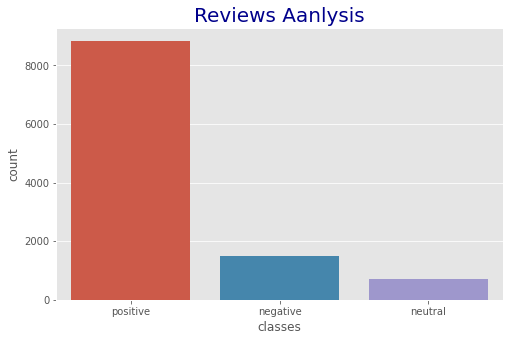

In [63]:
# Analyzing 'classes' column
reviews = df.classes.value_counts()
print(reviews)
print('*'*50)

plt.figure(figsize=[8,5])
plt.title(label = "Reviews Aanlysis", fontsize= 20, color='darkblue')
sns.countplot(df['classes'])
plt.show()

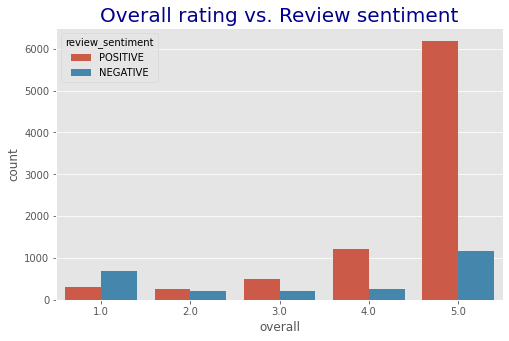

In [64]:
# Checking review sentiment on overall rating
plt.figure(figsize= [8,5])
sns.countplot(data=df,x=df.overall,hue=df.review_sentiment)
plt.title(label = 'Overall rating vs. Review sentiment', fontsize= 20, color='darkblue')
plt.show()

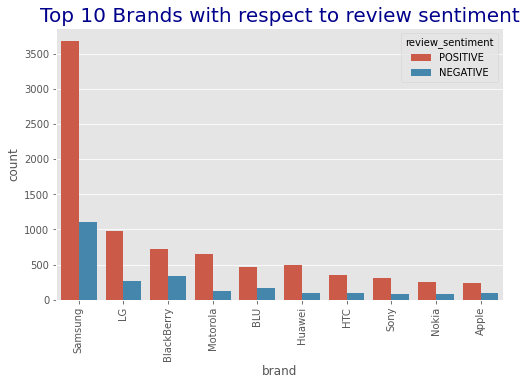

In [65]:
# Top 10 Brands with respect to review sentiment
plt.figure(figsize=[8,5])
sns.countplot(data=df,x=df.brand,hue=df.review_sentiment,order=df.brand.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Top 10 Brands with respect to review sentiment',fontsize=20, color='darkblue')
plt.show()

From the above Plot we can see that **Samsung**  has most positive review regarding there product.

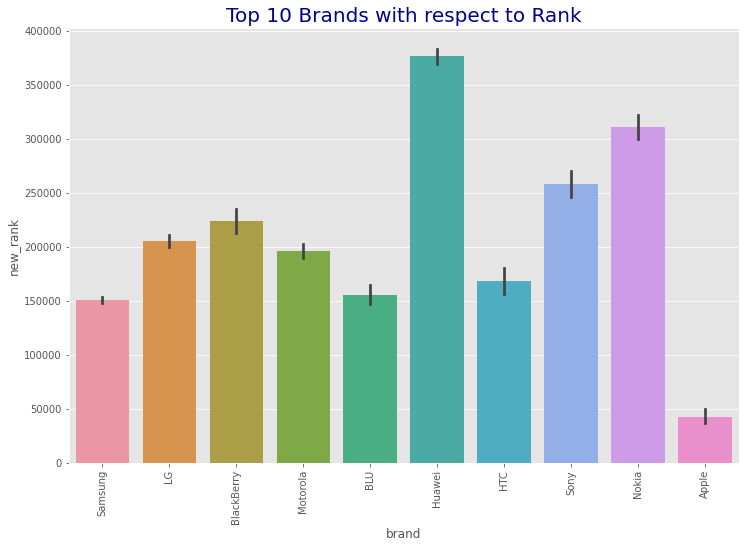

In [104]:
# Top 10 Brands with respect to Rank
plt.figure(figsize=[12,8])
sns.barplot (data=df,x=df.brand,y=df.new_rank,order=df.brand.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Top 10 Brands with respect to Rank',color='darkblue', fontsize=20)
plt.show()

**Huawei** is most respected brand along with **Nokia** & **Sony**

In [67]:
# Converting 'verified' column having boolean values with 0 and 1
df.verified.replace({False : 0 , True : 1}, inplace = True)

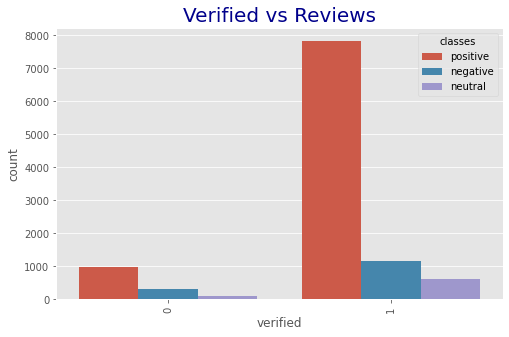

In [68]:
# Verified vs review sentiment
plt.figure(figsize=[8,5])
sns.countplot(data=df,x=df['verified'],hue=df['classes'])
plt.xticks(rotation=90)
plt.title('Verified vs Reviews',fontsize=20,color='darkblue')
plt.show()

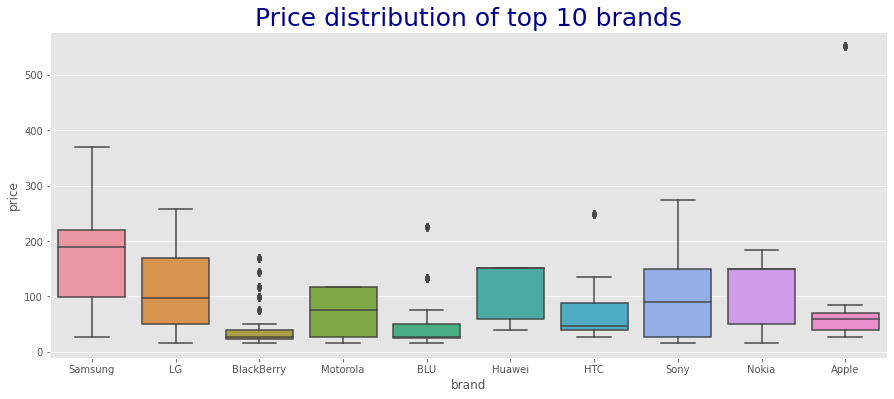

In [69]:
# Price distribution among top 10 Brands
plt.figure(figsize=[15,6])
plt.title('Price distribution of top 10 brands', fontsize=25, color = 'darkblue')
sns.boxplot(data=df,x='brand',y='price',order=df['brand'].value_counts().iloc[:10].index)
plt.show()

Every Company have there own price range in the market
but **Samsung** has wide range of price and **LG** and **Sony** has mostly same price range.

# Text Analytics

In [70]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [71]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/sentiment_anaylsis/stop_words_long.txt')]

In [72]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat','Unnamed: 0.1', 'Unnamed: 0.1.1' ],axis=1)
  
  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df


In [73]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0). 
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1 
    return 0

In [74]:
# Dropping all unnecessary columns and rows
df=clean_dataframe(df)

In [75]:
df.head()

,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,category,also_buy,image,brand,feature,rank,details,similar_item,price,Other_brand_name,new_rank,classes,y
0,4.0,A1ICOB5XZ9GK3R,"I gave it a four because when I first got it, ...",Blackberry Rim 8520,POSITIVE,2009-09-06,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2
1,5.0,A2O0XNK7T4KASU,Good,Good,POSITIVE,2017-08-17,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2
2,5.0,A3CB1J66JA929L,ok,Five Stars,POSITIVE,2017-07-14,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2
3,5.0,A1H8OJ4PPV9R12,Excelente!,Five Stars,NEGATIVE,2017-02-16,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2
4,1.0,A2H6U09YBWFYPJ,unhappy with the product ... is not what I wan...,One Star,NEGATIVE,2016-12-24,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,negative,0


In [76]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [77]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))

  # stemming
  stemmer = PorterStemmer()
  
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english") 
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [78]:
# Changing the dtype of 'reviewText' column to str
df['reviewText']=df['reviewText'].astype('str')

In [79]:
# Removing all the punctuations and stop words from dataframe
df=text_process(df)

In [80]:
# Dropping null values to have a cleaner dataset
df = df.dropna(subset=['cleaned_reviews'])

In [81]:
df.to_excel("/content/drive/MyDrive/data_tableau.xlsx", engine='xlsxwriter') 

We can use this clean excel file for tableau visualization.

In [82]:
df.head(3)

,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,category,also_buy,image,brand,feature,rank,details,similar_item,price,Other_brand_name,new_rank,classes,y,cleaned_reviews
0,4.0,A1ICOB5XZ9GK3R,i gave it a four because when i first got it i...,Blackberry Rim 8520,POSITIVE,2009-09-06,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2,gave four first got took time see get use key ...
1,5.0,A2O0XNK7T4KASU,good,Good,POSITIVE,2017-08-17,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2,good
2,5.0,A3CB1J66JA929L,ok,Five Stars,POSITIVE,2017-07-14,"['Cell Phones & Accessories', 'Cell Phones', '...","['B004G8QNDA', 'B002LDHF2K', 'B0085EIE38', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,BlackBerry,"['2.0MP Digital Camera, High-resolution displa...","['>#228,047 in Cell Phones & Accessories (See ...",{},"class=""a-bordered a-horizontal-stripes a-spa...",16.0,[],228047.0,positive,2,ok


In [83]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

In [84]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above

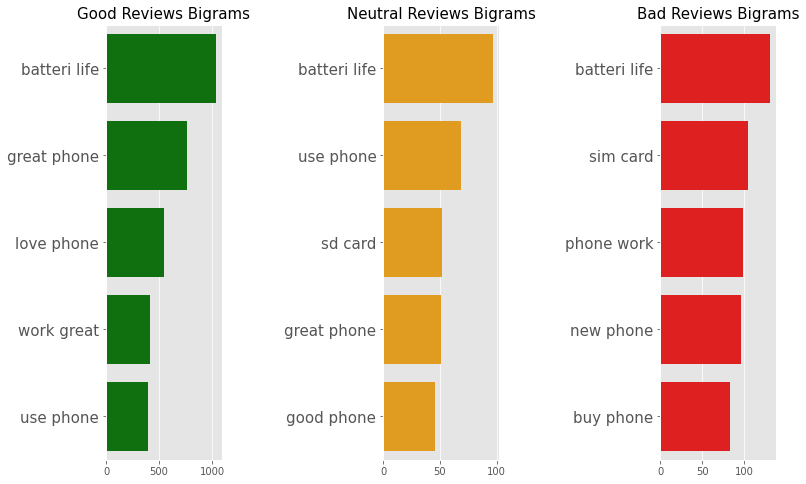

In [85]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(12,8))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','orange')
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

The above Bigrams shows the sentiment review analysis of all aspects of the brands

In [86]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

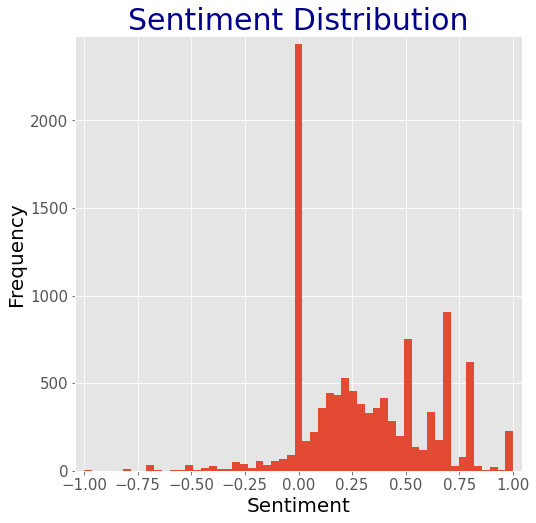

In [87]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20, color='black')
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=20, color='black')
plt.yticks(fontsize=15)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution', fontsize=30, color= 'darkblue')
plt.show()

By the above visual we can say that there number of neutal exist in our merged dataset is more than positive and negative reviews.

we also see that people tend to put in reviews only when its positive or when its neutral and they barely put up a reviews when its really bad product.


In [88]:
#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

#Libraries to implement Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

#Libraries to implement and optimize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#To create Pipelines and select best feautures before passing through the model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

#Pre-processing and NLP libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer


In [89]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [90]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]

In [91]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier3= Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])

In [92]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

**Random Forest Classifier - Count Vectorizer:**

In [93]:
print("Random Forest Classifier - Count Vectorizer:")
print('*'*50)
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
**************************************************
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x7fa8c4b0bca0>)),
                ('clf', RandomForestClassifier())])
0.8474347434743474


In [121]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.001,0.01,0.1,1,2,3,4,5,6,8,10,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

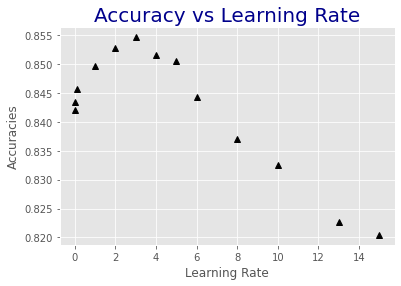

**************************************************
[0.8420342034203421, 0.8433843384338434, 0.8456345634563457, 0.8496849684968497, 0.8528352835283528, 0.8546354635463547, 0.8514851485148515, 0.8505850585058505, 0.8442844284428442, 0.8370837083708371, 0.8325832583258326, 0.8226822682268227, 0.8204320432043204]


In [122]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.title('Accuracy vs Learning Rate', color ='darkblue', fontsize=20)
plt.show()

print('*'*50)
print(y_accuracy)

**Running Multinomial Naive Bayes - Counter Vectorizer**

In [96]:
print("Multinomial Naive Bayes - Count Vectorizer:")
print('*'*50)
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
**************************************************
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa8c4b0bca0>)),
                ('clf', MultinomialNB(alpha=11))])
0.8285328532853286


**Running Bernoulli Naive Bayes - Count Vectorizer:**

In [97]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
print('*'*50)
run_model(text_clf_classifier3)

Bernoulli Naive Bayes - Count Vectorizer:
**************************************************
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa8c4b0bca0>)),
                ('clf', BernoulliNB(alpha=11))])
0.7758775877587759


**Taking Predictions**

In [98]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [99]:
prediction("works good, viewing angle critical for good picture,the size was perfect for the location")

2

In [100]:
# Saving final result in .csv file
df.to_csv('/content/drive/MyDrive/final_result_for_capstone.csv')

**Saving the final result of this Analysis in csv file**